# day 370

# Singular Value Decomposition:

* It is an extension of Eigen Decomposition.


## left transpose and right transpose:
![sdfsdf](images/090524_lin.png)

### notes:
* regardless of what direction you take the transpose of the square matrix you will get square matrix.

## Column space and row space of a matrix:
![sfsdf](images/090524_lin1.png)

### notes:
* size of U is row*row
* size of V is col*col

but, what are column space and row space of a matrix?

A = \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} 

The column space of a matrix consists of all possible linear combinations of its column vectors. In the case of a 3x3 matrix, the column space is the space spanned by the vectors formed by the columns of the matrix.

So, for our matrix \( A \), the column space \( C(A) \) is the space spanned by the column vectors:

 A =  \begin{bmatrix} a_{11} \\ a_{21} \\ a_{31} \end{bmatrix}, \begin{bmatrix} a_{12} \\ a_{22} \\ a_{32} \end{bmatrix}, \begin{bmatrix} a_{13} \\ a_{23} \\ a_{33} \end{bmatrix}

The row space of a matrix consists of all possible linear combinations of its row vectors. In the case of a 3x3 matrix, the row space is the space spanned by the vectors formed by the rows of the matrix.

So, for our matrix \( A \), the row space \( R(A) \) is the space spanned by the row vectors:

A =   \begin{bmatrix} a_{11} & a_{12} & a_{13} \end{bmatrix}, \begin{bmatrix} a_{21} & a_{22} & a_{23} \end{bmatrix}, \begin{bmatrix} a_{31} & a_{32} & a_{33} \end{bmatrix} 

Both the column space and the row space are subspaces of $R^3$  because our matrix is a 3x3 matrix. They represent different aspects of the linear transformation represented by the matrix \( A \). The column space captures the output space of the transformation, while the row space captures the input space of the transformation.

## Big picture of SVD:
![fsfs](images/090524_lin2.png)

### notes:
* notice the dimension of the original matrix and the dimension of U (orthogonal basis of column space of A), and the dimension of V (orthogonal basis of row space of A), and the dimension of sigma(singular values of a), which is as same as A.
* sigma is a diagonal matrix.

## what if the matrix was symmetric and you take SVD for it?
![fssd](images/090524_lin3.png)

### notes:
* the orthogonal matrix's transpose is = inverse of it. U^T = U^-1. Hence you get the identity matrix.
* sigma is a diagonal matrix so, when you multiply sigma with its transpose you'd get squared values in its diagonal.
* And the final thing is all the matrices both on left and right sides are going to have squared dimensions(p*p).
* $A^T.A$ gives us this answer
* since U comes in the left side, it is said to have left singular vectors in it. 
* since V comes in the right side, it is said to have right singular vectors in it.

## how to compute U:
![fsf](images/100524_lin4.png)

### notes:
* $A.A^T$ gives us this answer.


## feel it?
![fsf](images/100524_lin.png)

### notes
* $A^T.A = V\sum^{2} V^T $
* $A.A^T = U\sum^{2} U^T $
* the eigen values $\left( \sum^{2} \right) $ in both equations are same.


## position matters for matrix computation:
![fsf](images/100524_lin1.png)

### notes:
* notice the position and the transformation the U and V get to have.
* u and v are imagined as vectors scaled by $\sigma$. u is called left singular vector and v is called right singular vector because of their position.

## exploration, ablation-analysis and freethrows

#### c(a.a^T) = c(a) and r(a^T.a) = r(a)

In [19]:
import numpy as np
a = np.random.randint(0,9,(3,4))

U,s,transpose_V = np.linalg.svd(a)

array([[8, 3, 4, 8],
       [3, 1, 1, 4],
       [3, 4, 3, 1]])

In [20]:
# check whether  c(a.a^T) = c(a)
a@a.T # it is a square matrix.

array([[153,  63,  56],
       [ 63,  27,  20],
       [ 56,  20,  35]])

In [21]:
a.T@a # it is also a square matrix. 

array([[82, 39, 44, 79],
       [39, 26, 25, 32],
       [44, 25, 26, 39],
       [79, 32, 39, 81]])

conclusion: i have no idea

# code for SVD:

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

In [2]:
A = np.random.randint(0,9,(2,3))
A

array([[8, 0, 6],
       [0, 2, 8]])

In [3]:
U,S,V = np.linalg.svd(A) # S is not diagonal and V is already transposed.
U,S,V

(array([[ 0.81124219, -0.58471028],
        [ 0.58471028,  0.81124219]]),
 array([11.60157069,  5.77958108]),
 array([[ 0.55940162,  0.10079847,  0.8227451 ],
        [-0.80934625,  0.28072698,  0.51589825],
        [-0.178965  , -0.95447998,  0.23861999]]))

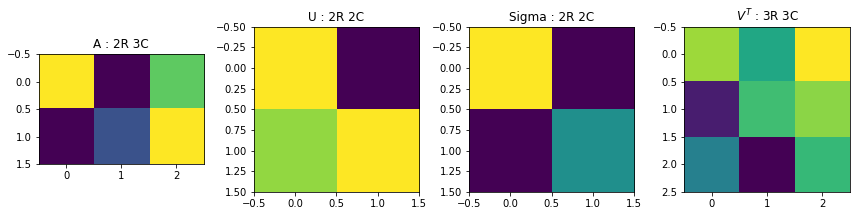

In [4]:
fig,ax = plt.subplots(1,4,figsize=(12,5))

ax[0].imshow(A)
ax[0].set_title('A : {}R {}C'.format(A.shape[0],A.shape[1]))

ax[1].imshow(U)
ax[1].set_title('U : {}R {}C'.format(U.shape[0],U.shape[1]))

ax[2].imshow(np.diag(S))
ax[2].set_title('Sigma : {}R {}C'.format(np.diag(S).shape[0],np.diag(S).shape[1]))

ax[3].imshow(V)
ax[3].set_title('$V^T$ : {}R {}C'.format(V.shape[0],V.shape[1]))

plt.tight_layout()
plt.show()

In [9]:
S.shape[0]

# conclusion:
* shape of V is C*C of A
* shape of U is R*R of A

# day 371

In [2]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# code challenge: Relationship between eig and SVD for a square symmetric matrix.

In [24]:
A = np.random.randint(1,9,(3,3))
A = A.T@A
A

array([[109,  52, 110],
       [ 52,  36,  54],
       [110,  54, 117]])

In [25]:
eig_values,eig_vectors = np.linalg.eig(A)
eig_values,eig_vectors

(array([249.40731004,   2.92694017,   9.66574979]),
 array([[ 0.65485684,  0.71819613,  0.23528034],
        [ 0.33142971,  0.00687468, -0.94345487],
        [ 0.67920311, -0.69580677,  0.23352961]]))

In [34]:
U,S,transpose_V = np.linalg.svd(A) # in SVD by default it gives V.T so, so we have to take transpose of V.T to get actual V
U,S,transpose_V.T

(array([[-0.65485684,  0.23528034, -0.71819613],
        [-0.33142971, -0.94345487, -0.00687468],
        [-0.67920311,  0.23352961,  0.69580677]]),
 array([249.40731004,   9.66574979,   2.92694017]),
 array([[-0.65485684,  0.23528034, -0.71819613],
        [-0.33142971, -0.94345487, -0.00687468],
        [-0.67920311,  0.23352961,  0.69580677]]))

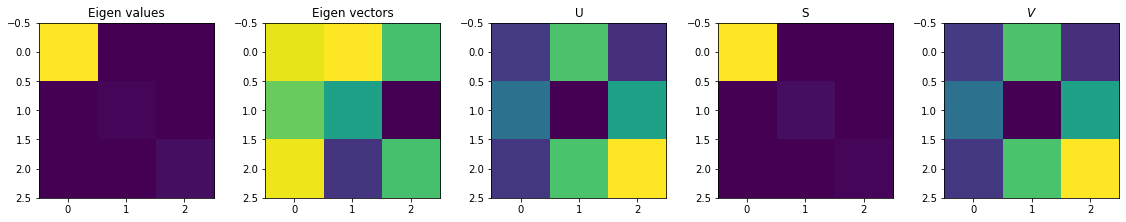

In [35]:
fig,ax = plt.subplots(1,5,figsize=(16,5))

ax[0].imshow(np.diag(eig_values))
ax[0].set_title('Eigen values')

ax[1].imshow(eig_vectors) # take the absolute values to combat sign the inherent uncertainty
ax[1].set_title('Eigen vectors')

ax[2].imshow(U)
ax[2].set_title('U')

ax[3].imshow(np.diag(S))
ax[3].set_title('S')

ax[4].imshow(transpose_V.T)
ax[4].set_title('$V$')


plt.tight_layout(pad=2)
plt.show()

## conclusion: both eigen decomposition and SVD seem to produce the same results when the matrix is square symmetric but the difference comes as in eigen decomposition the eigen_vector values are not sorted but for SVD the values are sorted

In [28]:
# sort eig outputs
sidx = np.argsort(eig_values)[::-1]  # sort the keys in reverse order
sidx

array([0, 2, 1], dtype=int64)

In [29]:
# get the eigen values in sorted fashion
eig_values[sidx]

array([249.40731004,   9.66574979,   2.92694017])

In [30]:
# get the eigen vectors in sorted fashion
eig_vectors[:,sidx] # column wise

array([[ 0.65485684,  0.23528034,  0.71819613],
       [ 0.33142971, -0.94345487,  0.00687468],
       [ 0.67920311,  0.23352961, -0.69580677]])

In [31]:
# compare it with U or V.T
U

array([[-0.65485684,  0.23528034, -0.71819613],
       [-0.33142971, -0.94345487, -0.00687468],
       [-0.67920311,  0.23352961,  0.69580677]])

In [36]:
transpose_V.T

array([[-0.65485684,  0.23528034, -0.71819613],
       [-0.33142971, -0.94345487, -0.00687468],
       [-0.67920311,  0.23352961,  0.69580677]])

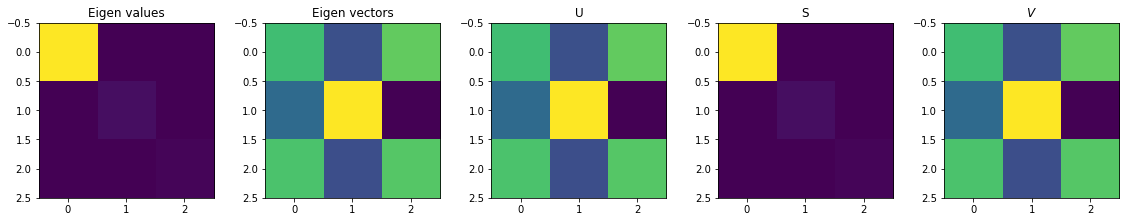

In [37]:
fig,ax = plt.subplots(1,5,figsize=(16,5))

sidx = np.argsort(eig_values)[::-1]
sorted_eig_values = np.diag(eig_values[sidx])
ax[0].imshow(sorted_eig_values)
ax[0].set_title('Eigen values')

sorted_eig_vectors = eig_vectors[:,sidx] # eigen vectors are columns vectors not row vectors 
ax[1].imshow(np.abs(sorted_eig_vectors)) # take the absolute values to combat sign the inherent uncertainty
ax[1].set_title('Eigen vectors')

ax[2].imshow(np.abs(U))
ax[2].set_title('U')

ax[3].imshow(np.diag(S))
ax[3].set_title('S')

ax[4].imshow(np.abs(transpose_V.T)) 
ax[4].set_title('$V$')


plt.tight_layout(pad=2)
plt.show()

# conclusion: when the matrix is symmetric both eigen decomposition and Singular Value Decomposition seem to produce same values but the difference is caused due to the fact that in SVD the values are pre arranged in descending order where as in eigen decomposition we have to do it manually

In [38]:
np.round(U-transpose_V.T,4) # for a symmetric matrix U and V are the same

array([[ 0., -0., -0.],
       [ 0.,  0.,  0.],
       [-0.,  0., -0.]])

In [43]:
# checking whether A = USV.T
U@np.diag(S)@transpose_V

array([[109.,  52., 110.],
       [ 52.,  36.,  54.],
       [110.,  54., 117.]])

In [42]:
A

array([[109,  52, 110],
       [ 52,  36,  54],
       [110,  54, 117]])

# Relationship between S in SVD and eig_values

In [47]:
A = np.random.randint(0,9,(2,3))
A

array([[8, 3, 1],
       [2, 1, 3]])

In [49]:
# case1: eig_values in eig(A.T,A) vs S in SVD(A)

eig_values,eig_vectors = np.linalg.eig(A.T@A)
np.sort(eig_values) # sorted in ascending order

array([-1.27308303e-15,  6.79784952e+00,  8.12021505e+01])

In [51]:
U,S,transpose_V = np.linalg.svd(A) # we are taking SVD of A only not its symmetric form
np.sort(S**2)

array([ 6.79784952, 81.20215048])

# conclusion: both are same except eig_values has that extra 0

In [63]:
# case 2: eig_values in eig(A.T@A) vs S in SVD(A.T@A)

eig_values,eig_vectors = np.linalg.eig(A.T@A)
U,S,V = np.linalg.svd(A.T@A)


In [64]:
np.sort(eig_values)

array([  3.24057041,  42.53890245, 163.22052715])

In [65]:
np.sort(S)

array([  3.24057041,  42.53890245, 163.22052715])

# Both Eigen values and Sigma in SVD are same when the matrix is symmetric(A.T@A)

In [67]:
# case3: eig_values in eig(A) vs S in SVD(A) when A is a square matrix

A = np.random.randint(0,9,(3,3),) # lets keep the A Square

eig_values,eig_vectors = np.linalg.eig(A)
U,S,transpose_V = np.linalg.svd(A)

np.sort(eig_values)

array([-0.15361946-0.91430141j, -0.15361946+0.91430141j,
        9.30723892+0.j        ])

In [68]:
np.sort(S)

array([ 0.52111869,  1.39688599, 10.98986555])

# conclusion: there is no relationship between eig_values and S if the matrix is not symmetric. S would never have complex numbers in it.

# day 374,375

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

![sfsd](Images/270524_lin.png)

* i is the column number here except for sigma. for sigma i access its corresponding element.

# prove that: $ \frac{Av_i}{\sigma_i} = u_i  $

## goals:
1. create a matrix of size (3x6)
2. find SVD (variables U,sigma,transpose_V)
3. find eigen decomposition(eigen values and eigen vectors) of A.T.A .
4. confirm eigen vectors = V of svd
5. check the relationship between sigma's and eigen values.
6. create U using only A,V and eigen values.
7. confirm that U == u_i.

In [16]:
# 1. create a matrix of size (3x6)
A = np.random.randint(0,9,(3,6))
A

array([[6, 3, 3, 6, 8, 3],
       [5, 8, 1, 0, 0, 6],
       [0, 4, 1, 5, 3, 6]])

In [17]:
# 2. full SVD (variables U,sigma,transpose_V)
U,sigma,transpose_V = np.linalg.svd(A)
transpose_V

array([[ 0.40351599,  0.49382499,  0.18293904,  0.38927834,  0.41235493,
         0.48812992],
       [-0.02116812, -0.540611  ,  0.13112105,  0.44891233,  0.60354356,
        -0.35257882],
       [-0.77445079, -0.03100604, -0.1161909 ,  0.4224785 , -0.08235349,
         0.44776568],
       [ 0.25746622,  0.11897579, -0.74900023,  0.49249275, -0.23307649,
        -0.2483562 ],
       [-0.2824123 ,  0.30029043, -0.49593622, -0.42149638,  0.63219404,
        -0.08238762],
       [ 0.30150816, -0.59882024, -0.35900722, -0.2196445 ,  0.07016079,
         0.60700472]])

In [18]:
V = transpose_V.T
V

array([[ 0.40351599, -0.02116812, -0.77445079,  0.25746622, -0.2824123 ,
         0.30150816],
       [ 0.49382499, -0.540611  , -0.03100604,  0.11897579,  0.30029043,
        -0.59882024],
       [ 0.18293904,  0.13112105, -0.1161909 , -0.74900023, -0.49593622,
        -0.35900722],
       [ 0.38927834,  0.44891233,  0.4224785 ,  0.49249275, -0.42149638,
        -0.2196445 ],
       [ 0.41235493,  0.60354356, -0.08235349, -0.23307649,  0.63219404,
         0.07016079],
       [ 0.48812992, -0.35257882,  0.44776568, -0.2483562 , -0.08238762,
         0.60700472]])

In [19]:
sigma

array([16.85984722,  8.20119004,  4.94833644])

In [20]:
U

array([[ 0.68507663,  0.62291051, -0.37769368],
       [ 0.53855164, -0.78221336, -0.31321619],
       [ 0.4905427 , -0.01116954,  0.87134557]])

In [21]:
# 3. find eigen decomposition(eigen values and eigen vectors) of A^T.A


eig_values, eig_vectors = np.linalg.eig(A.T@A)
eig_values,eig_vectors

(array([ 2.84254448e+02,  4.43904416e-16,  2.44860336e+01,  6.72595181e+01,
        -3.89199591e-15,  1.71336602e-15]),
 array([[ 0.40351599,  0.48677791, -0.77445079, -0.02116812, -0.16235398,
         -0.329171  ],
        [ 0.49382499, -0.48219659, -0.03100604, -0.540611  , -0.17035811,
          0.58798778],
        [ 0.18293904, -0.33080256, -0.1161909 ,  0.13112105,  0.90319508,
          0.42483226],
        [ 0.38927834,  0.36898018,  0.4224785 ,  0.44891233, -0.28933172,
          0.16430691],
        [ 0.41235493, -0.44659925, -0.08235349,  0.60354356, -0.01551457,
         -0.03847948],
        [ 0.48812992,  0.29241429,  0.44776568, -0.35257882,  0.21190661,
         -0.58047992]]))

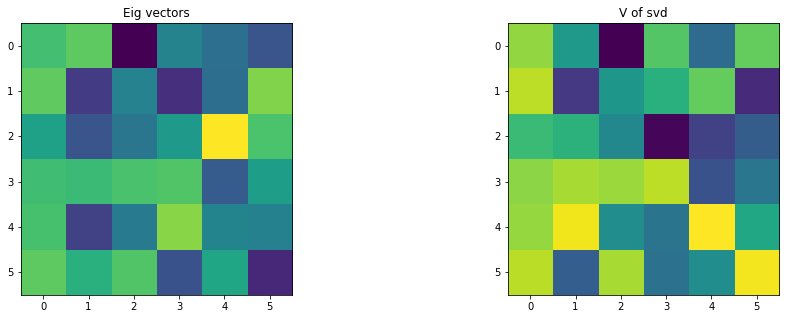

In [22]:
# 4. confirm eigen vectors = V of svd

fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].imshow(eig_vectors)
ax[0].set_title('Eig vectors')

ax[1].imshow(V)
ax[1].set_title('V of svd')

plt.show()

In [23]:
np.argsort(eig_values)[::-1]

array([0, 3, 2, 5, 1, 4], dtype=int64)

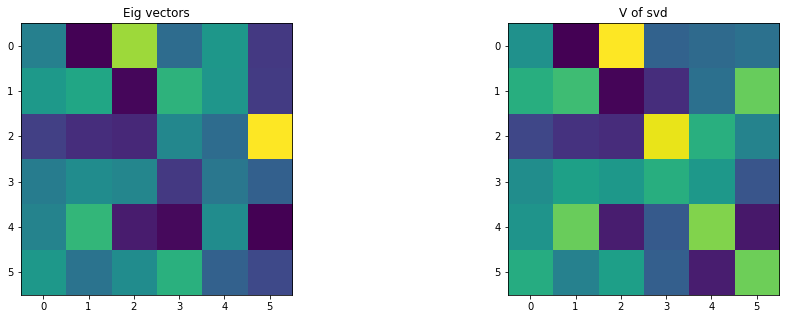

In [24]:
# make them equal

# since in eigen vectors the elements are not sorted we want to sort it manually
sidx = np.argsort(eig_values)[::-1] # sort the keys
sorted_eig_vectors = eig_vectors[:,sidx]

# now compare the absolute sorted_eig_vectors with absolute V of svd
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].imshow(abs(sorted_eig_vectors))
ax[0].set_title('Eig vectors')

ax[1].imshow(abs(V))
ax[1].set_title('V of svd')

plt.show()

In [26]:
# first 3 columns seem to be equal (which corresponds to the rank of the matrix)

np.round(np.abs(sorted_eig_vectors),5) == np.round(np.abs(V),5) # we use abs to evade sign uncertainty

array([[ True,  True,  True, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True, False, False, False]])

this is because there is some loss of information due to the matrix being rectangular not square

In [27]:
# 5. check the relationship between sigma's and eigen values.

eig_values,sigma

(array([ 2.84254448e+02,  4.43904416e-16,  2.44860336e+01,  6.72595181e+01,
        -3.89199591e-15,  1.71336602e-15]),
 array([16.85984722,  8.20119004,  4.94833644]))

In [28]:
np.argsort(eig_values)[::-1],sidx

(array([0, 3, 2, 5, 1, 4], dtype=int64),
 array([0, 3, 2, 5, 1, 4], dtype=int64))

In [29]:
sorted_eig_values = eig_values[sidx]
np.round(sorted_eig_values,4)

array([284.2544,  67.2595,  24.486 ,   0.    ,   0.    ,  -0.    ])

In [30]:
sigma

array([16.85984722,  8.20119004,  4.94833644])

In [31]:
sigma**2

array([284.2544483 ,  67.25951815,  24.48603355])

In [39]:
# recreate u_i using Av_i/sigma_i

u_i = np.zeros((len(sigma),len(sigma)))
for i in range(len(sigma)): # len of sigma is as same as number of cols of U and V
    u_i[:,i] = A@V[:,i]/sigma[i]

    
    
    
u_i    

array([[ 0.68507663,  0.62291051, -0.37769368],
       [ 0.53855164, -0.78221336, -0.31321619],
       [ 0.4905427 , -0.01116954,  0.87134557]])

In [42]:
# confirm that U == u_i

U

array([[ 0.68507663,  0.62291051, -0.37769368],
       [ 0.53855164, -0.78221336, -0.31321619],
       [ 0.4905427 , -0.01116954,  0.87134557]])

conclusion: confirmed

## exploration, analysis and freethrows

In [40]:
U

array([[ 0.68507663,  0.62291051, -0.37769368],
       [ 0.53855164, -0.78221336, -0.31321619],
       [ 0.4905427 , -0.01116954,  0.87134557]])

In [34]:
V.shape

In [37]:
A.shape

In [41]:
A@V[:,0]/sigma[0]

array([0.68507663, 0.53855164, 0.4905427 ])

In [36]:
sorted_eig_values

array([ 2.84254448e+02,  6.72595181e+01,  2.44860336e+01,  1.71336602e-15,
        4.43904416e-16, -3.89199591e-15])

# The Four Subspaces of the matrix and SVD

## The four subspaces are:
1. column space
2. row space.
3. null space.
4. left null space.

![sfs](images/280524_lin.png)
![sfs](images/280524_lin1.png)

* if it was a square matrix we wouldn't have that extra zeros

## Any zero valued singular values(Sigma) correspond to the null space of the matrix:
![sfs](images/280524_lin2.png)
* the rank of the matrix corresponds to the number of non-zero singular values.

## another example:
![sfs](images/280524_lin3.png)
![sfs](images/280524_lin4.png)


## generalize it:
![fsfs](images/090524_lin2.png)
![sfs](images/280524_lin5.png)

# day 378

# spectral theory of matrices
* visual light has many colors -vibgyor, when you add all those colors you will see the white light.
* similarly a matrix is analogous to that white light.
* just like you can discretize the colors that emanate from the light into seperate categories, you can discretize the individual component that make the matrix the thing it is.

![sfsf](images/010624_lin.png)


## Break the complicated problems into its simpler individual units:
![sfsdf](images/010624_lin1.png)

* This is how you solve a complicated problem.
* however complex problems are different. They are sometimes unsolvable.


## constructing the original matrix layer by layer using SVD:
![fsfs](images/010624_lin2.png)


* information in the matrix is more often distributed across multiple columns and multiple rows rather than in single or couple of super specialized rows and columns, so that's why taking the dot products reveal some non-apparent, beautiful information that were not so obvious.

* Distributed Information: In many practical scenarios, especially in data science, machine learning, and signal processing, matrices contain information that is spread out across multiple dimensions.

* Dot Products: Taking dot products (or other similar operations like matrix multiplication) combines and correlates information from different rows and columns, which can reveal underlying patterns and relationships that are not immediately apparent from the raw data.

![sfs](images/280524_lin5.png)

* The whole ambient space of M is covered by U with help of left null space. dim(C(A)) + dim(N(A^T)) = M. so, the left null space comes in to fulfill the gaps left by column space of (A).
* Likewise, The whole ambient space of N is covered by V with help of null space. dim(C(A^T)) + dim(N(A)) = N. so, the null space comes in to fulfill the gaps left by Row space of A (C(A^T)).
* A is constructed layer by layer by taking each column of U and scaling it by the corresponding singular values of $\Sigma$ and multiplied by corresponding column of $V^T$. 
* This entire thing U[:,i] * $ \Sigma $ [i] * V[:,i] is called a component. 
* each component is a rank 1 matrix.
![fsfs](images/010624_lin3.png)

* and you add all the components to get the original matrix.

## the video reference:
[Spectral theory of matrices](https://www.udemy.com/course/linear-algebra-theory-and-implementation/learn/lecture/10521284#overview)

# day 378, day 379

In [9]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [7]:
!pip install scipy

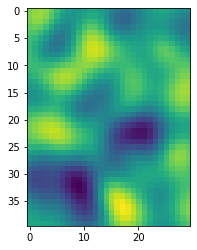

In [10]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix: applying a 2d convolution to a noise smoothed guassian data
A = signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

## exploration, ablation-analysis and freethrows

In [11]:
k

In [16]:
g2d

array([[2.09541607e-04, 5.65420319e-04, 1.33657212e-03, 2.76779063e-03,
        5.02104275e-03, 7.97947744e-03, 1.11089965e-02, 1.35486199e-02,
        1.44755521e-02, 1.35486199e-02, 1.11089965e-02, 7.97947744e-03,
        5.02104275e-03, 2.76779063e-03, 1.33657212e-03, 5.65420319e-04,
        2.09541607e-04],
       [5.65420319e-04, 1.52571196e-03, 3.60656314e-03, 7.46851703e-03,
        1.35486199e-02, 2.15315647e-02, 2.99761582e-02, 3.65591592e-02,
        3.90603631e-02, 3.65591592e-02, 2.99761582e-02, 2.15315647e-02,
        1.35486199e-02, 7.46851703e-03, 3.60656314e-03, 1.52571196e-03,
        5.65420319e-04],
       [1.33657212e-03, 3.60656314e-03, 8.52539534e-03, 1.76544976e-02,
        3.20269844e-02, 5.08975151e-02, 7.08593166e-02, 8.64205822e-02,
        9.23330674e-02, 8.64205822e-02, 7.08593166e-02, 5.08975151e-02,
        3.20269844e-02, 1.76544976e-02, 8.52539534e-03, 3.60656314e-03,
        1.33657212e-03],
       [2.76779063e-03, 7.46851703e-03, 1.76544976e-02, 3.655

In [15]:
A

array([[ 3.36081059,  4.2452081 ,  4.51305462, ..., -1.70177691,
        -2.4280849 , -2.7799197 ],
       [ 3.55052216,  4.42257203,  4.57225118, ..., -2.7361895 ,
        -3.42653792, -3.6311537 ],
       [ 3.3214438 ,  4.02741233,  3.95138309, ..., -3.53816998,
        -4.1842253 , -4.24883483],
       ...,
       [-1.02219998, -1.60534099, -2.11379659, ...,  1.3677275 ,
         2.69335619,  3.51564528],
       [-0.65967698, -0.97282719, -1.2517021 , ...,  0.87256468,
         2.1125123 ,  2.92667016],
       [-0.45925814, -0.54309428, -0.60903644, ...,  0.12488431,
         1.22334281,  1.99868615]])

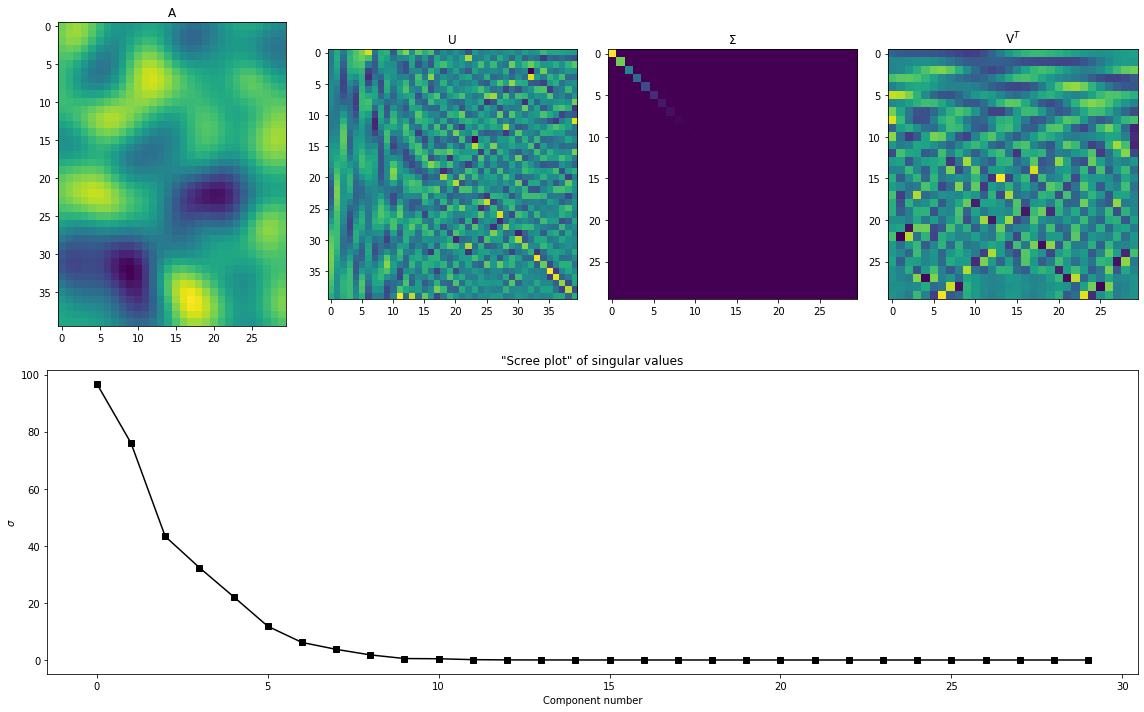

In [21]:
# SVD (remember that V comes out transposed)
U,S,transpose_V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(16,10))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(transpose_V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.tight_layout()
plt.show()

## conclusion: 
* The screeplot shows the number of important components and it appears that only 5-6 ish of components are making the whole of the matrix and other components are just repitition.

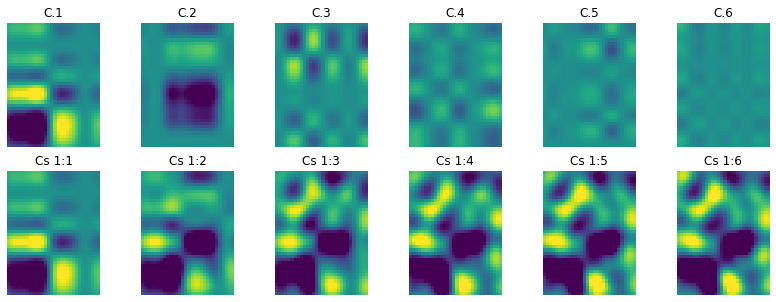

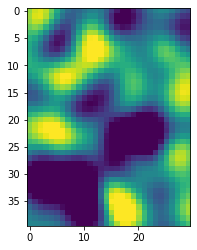

In [26]:
# lets produce all the rank1 components of the matrix

n_of_components = 6

rank1mats = np.zeros((n_of_components,m,n))

fig,ax = plt.subplots(2,n_of_components,figsize=(14,5))
for i in range(0,n_of_components):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],transpose_V[i,:] ) # outer product is guaranteed to produce a matrix despite the size mismatch
    
    
    ax[0][i].imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    ax[0][i].axis('off')
    ax[0][i].set_title('C.%d' %(i+1))
    
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    ax[1][i].imshow(imdat,vmin=-5,vmax=5)
    ax[1][i].axis('off')
    ax[1][i].set_title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()

## exploration, ablation-analysis and freethrows

In [28]:
U[:,0]*S[0]

array([ -7.14646408,  -7.99116881,  -7.69411823,  -6.09514437,
        -3.88656334,  -1.76542103,  -0.5140918 ,  -0.52531879,
        -1.97783979,  -4.2845728 ,  -6.64446613,  -8.05562736,
        -7.55662207,  -4.90108307,  -0.62319668,   3.88642246,
         6.63253769,   6.42956689,   2.77492499,  -3.65394667,
       -11.22487572, -17.84739423, -21.66068185, -21.53049645,
       -17.43178663, -10.4045817 ,  -2.01190467,   6.36592314,
        13.7242048 ,  20.0003735 ,  24.99210846,  28.31462597,
        30.02816351,  30.1606393 ,  28.99670327,  27.10816982,
        24.66845921,  21.53587481,  17.72630303,  13.2784461 ])

In [29]:
U[:,0]*S[0]@transpose_V[0,:]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 40)

In [30]:
U[:,0].shape,transpose_V[0,:].shape

In [32]:
np.outer(U[:,0]*S[0],transpose_V[0,:])

array([[ 1.24937102,  1.47490988,  1.59648807, ..., -0.34595519,
        -0.51358042, -0.5915373 ],
       [ 1.39704539,  1.64924272,  1.78519132, ..., -0.38684674,
        -0.5742851 , -0.6614564 ],
       [ 1.34511392,  1.58793648,  1.71883155, ..., -0.37246673,
        -0.55293757, -0.63686851],
       ...,
       [-3.76498049, -4.44464202, -4.81101798, ...,  1.04253622,
         1.54767499,  1.78259809],
       [-3.0989772 , -3.65841054, -3.9599767 , ...,  0.85811759,
         1.27390023,  1.46726679],
       [-2.32138657, -2.74044774, -2.96634539, ...,  0.64280003,
         0.95425513,  1.09910244]])

In [45]:
# demeo of how outer works

a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
np.linalg.matrix_rank(a)

2

In [47]:
a.T@a # dot product

array([[ 66,  78,  90],
       [ 78,  93, 108],
       [ 90, 108, 126]])

In [48]:
a@a.T # inner product

array([[ 14,  32,  50],
       [ 32,  77, 122],
       [ 50, 122, 194]])

In [49]:
np.inner(a,a) 

array([[ 14,  32,  50],
       [ 32,  77, 122],
       [ 50, 122, 194]])

In [41]:
np.outer(a,a)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

## working mechanism of outer product:

![fsdfs](images/040624_lin.png)

## conclusion: Regrets:
* I made a mistake when submitting my ML_project 2 in amity portal, the mistake was the assumption that a 64x64 pixel image cannot be reduced in dimension further without making the image blury or lose all of its visually interpretable information. I could have used SVD or PCA to reduce its 64x64 matrix into some 5x5 matrix making the computation so much faster.
* I would lose 15 marks for that. 

# day 380

# lowering the rank to compress any image:

![fss](images/050624_lin.png)
![fss](images/050624_lin1.png)
![fss](images/050624_lin2.png)
* **note nose is missing. reduced rank matrix always cause some information from the matrix to go missing.** but even though the nose is missing, the general information the picture trying to convey which is the face is well conveyed and it is interpretable. 
![fss](images/050624_lin3.png)
![fss](images/050624_lin4.png)
![fss](images/050624_lin6.png)
![fss](images/050624_lin5.png)
![fss](images/050624_lin7.png)

* the important thing to note here is in order to recreate A we need left null space and null space of the matrix but removing the left null space and null space of the matrix compresses the size of the matrix and therefore compress the image, compresses its resolution which might help for faster computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math
from PIL import Image
import requests
from io import BytesIO

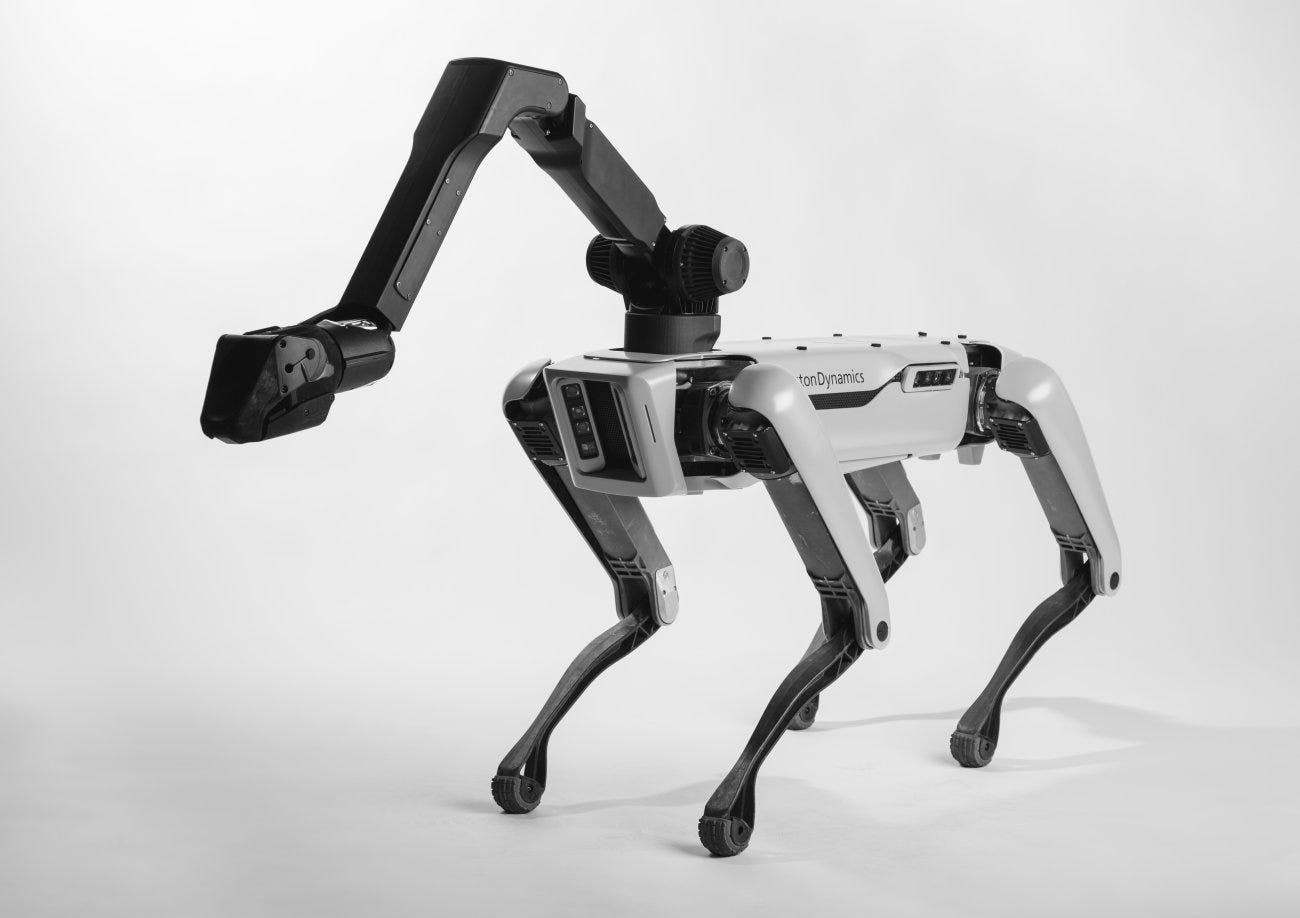

In [2]:
url = 'https://www.usatoday.com/gcdn/presto/2018/10/16/USAT/770a1d9b-f404-46c4-9ed2-25aa40f5d521-boston_dynamics_spot_mini.jpg'
response = requests.get(url).content
image_data = BytesIO(response)

image = Image.open(image_data)

# grey image to get rid off the color dimension (so that we don't have to work with a tensor now)
grey_image = image.convert('L')
grey_image

## exploration, ablation-analysis and freethrows



In [3]:
image.size

(1300, 918)

In [4]:
grey_image.size

(1300, 918)

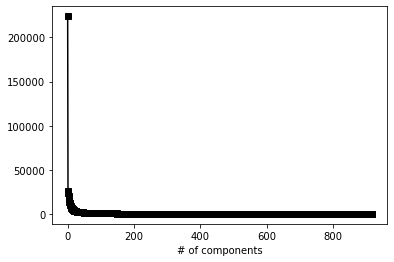

In [5]:
U,S,transpose_V = np.linalg.svd(grey_image)


# make a scree plot to determine the optimal number of components for the matrix
plt.plot(S,'ks-')
plt.xlabel('# of components')
plt.show()



## exploration, ablation-analysis and freethrows

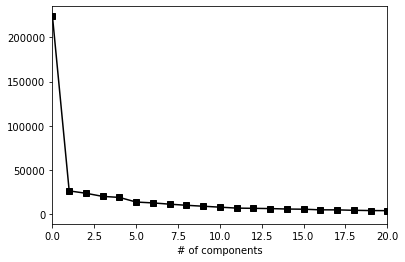

In [6]:
plt.plot(S,'ks-')
plt.xlabel('# of components')
# plt.ylim([0,1000])
plt.xlim([0,20])
plt.show()



* I think 10 components would be good for reconstructing the picture

In [23]:
# number of components (singular "layers") to keep
nComps = 10 # rank of the matrix

# reduced matrices
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = transpose_V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(reconImage) )

rank = 10


## exploration, ablation-analysis and freethrows

In [41]:
reconImage

array([[234.63861972, 234.7167456 , 234.84347549, ..., 240.81495979,
        240.79195555, 240.79195555],
       [234.63861972, 234.7167456 , 234.84347549, ..., 240.81495979,
        240.79195555, 240.79195555],
       [234.61865366, 234.69673177, 234.82332381, ..., 240.79955916,
        240.77657076, 240.77657076],
       ...,
       [194.05973738, 194.13392983, 194.25674585, ..., 198.76244921,
        198.73971305, 198.73971305],
       [193.74909676, 193.82314828, 193.94541003, ..., 198.41596009,
        198.39324796, 198.39324796],
       [193.550489  , 193.62437418, 193.74656254, ..., 198.22112076,
        198.19838754, 198.19838754]])

In [42]:
reconImage.shape

(918, 1300)

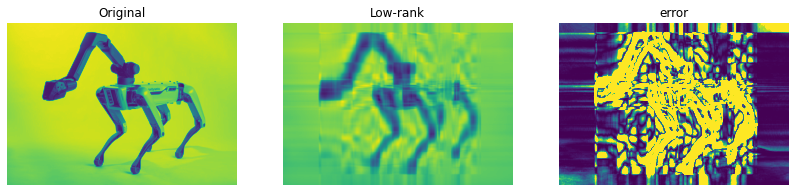

In [24]:
# error map and percent difference from original matrix
errormap = (reconImage-grey_image)**2

# show the results!
fig,ax = plt.subplots(1,3,figsize=(14,7))

ax[0].imshow(grey_image)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(reconImage)
ax[1].axis('off')
ax[1].set_title('Low-rank')

ax[2].imshow(errormap,vmin=0,vmax=255)
ax[2].axis('off')
ax[2].set_title('error')

plt.show()

* change the rank(increase or decrease) to experiment with it and you will observe obvious changes

## exploration, ablation-analysis and freethrows

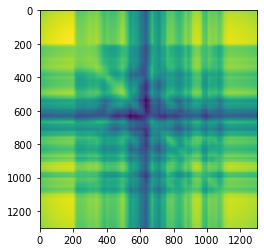

In [11]:
# converting a lower rank image into its symmetric matrix to observe the effect
kundi = reconImage.T@reconImage


plt.imshow(kundi)
plt.show()

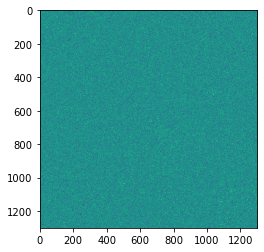

In [15]:
img_array = np.asarray(grey_image)
plt.imshow(img_array.T@img_array)
plt.show()

## conclusion:
* Low rank compression is often used to compress images when uploading it online.
* it is also used in signal processing, data analysis and faster computation.
*  Standard image formats like JPEG use other techniques like Discrete Cosine Transform (DCT) for efficient compression.

# day 381

In [27]:
import numpy as np
import sympy as sym
from IPython.display import Math,display
sym.init_printing()
import matplotlib.pyplot as plt

# convert singular values to percent variance:


## how to interpret singular values:
![sfsf](images/060624_lin.png)
* Above is a picture of singular values of 2 matrices. one has 8 singular values and the other has 678.
* singular values $ \Sigma $ are scale dependent and they change with the numbers in the matrix.
![fsds](images/060624_lin1.png)
* when you scale a matrix on the left side, you have to scale the right side too.
* any one of the elements in the right side can be scaled.
* but you can't scale just any. for example you can't scale U or V which are orthogonal column and row spaces so by definition they must hold only normalized vectors so, we are left with only one option that is to scale the singular values aka $\Sigma$ 

![sfsf](images/060624_lin2.png)
* U and V are just orthogonal basis as we know it only give direction, it is the corresponding singular value that gives each vector its magnitude to scale in the space to define the object.
* singular values give the variance to the matrix.so, adding all the singular values give the total variance of the matrix. so, we can actually calculate how much any single singular value contributes to the total variance of matrix A.
![sfsf](images/060624_lin3.png)

## Normalize singular values to an intrinsically meaningful metric:
![sfsf](images/060624_lin4.png)

* in the first matrix, the first component made with the first singular value contributes only 35% of recreating the original matrix because the first singular value/total singular values is 35%. This means we may need more components to recreate the original image(matrix). 
* in the second matrix, the first component contributed 82% of variance that 82% of the original image can be recreated with it. This means we can recreate the original matrix with far lesser components compared to what it may require of the first matrix.


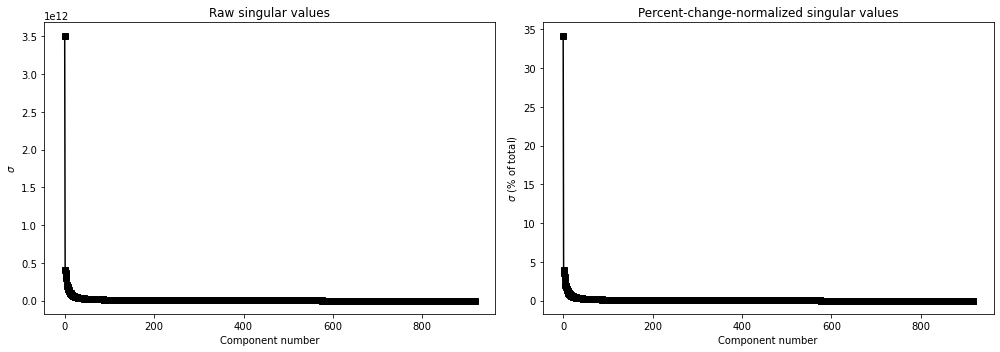

In [42]:
scaled_image = np.asarray(grey_image)*1565344 # you can also divide by any number. it doens't matter

# SVD
U,s,transpose_V = np.linalg.svd(scaled_image)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].plot(s,'ks-')
ax[0].set_xlabel('Component number')
ax[0].set_ylabel('$\sigma$')
ax[0].set_title('Raw singular values')

ax[1].plot(spct,'ks-')
ax[1].set_xlabel('Component number')
ax[1].set_ylabel('$\sigma$ (% of total)')
ax[1].set_title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()

* in our grey_scaled_image the first component seems only to contribute 35% in recreating the original image and the subsequent components seem to give lesser and lesser contribution.
* you can play with the scaler.

# day 382

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt


# code challenge:

## goals:
1. under what condition can you multiply U and V.T. Generate a matrix such that U@V.T is valid.
2. what would be the norm of U@V.T given that the norm of U and V.T are 1 becuase they are orthogonal bases? so, compute the norm of U and the norm of V.T and the norm of their combination(U@V.T).
3. compute and visualize U@U.T and V@V.T and U@V.T

## picture reference:
![fss](images/050624_lin6.png)

In [38]:
# Generate a matrix such that U@V.T is valid.

"""It would be valid only when the matrix is a square matrix or a symmetric matrix. m == n """

m = 5
n = 5

A = np.random.randn(m,n)
# A = A@A.T

U,s,transpose_V = np.linalg.svd(A)

U.shape,transpose_V.shape

In [39]:
# so now U@transpose_V would be valid
U@transpose_V

array([[ 0.39199027, -0.00339663, -0.59974096,  0.18247932,  0.67330837],
       [ 0.12405149,  0.10311305, -0.19588638,  0.84282652, -0.47460606],
       [-0.11213661, -0.01175664,  0.68060751,  0.48085387,  0.54114705],
       [ 0.7758666 , -0.52351893,  0.3020349 , -0.07313606, -0.16548411],
       [-0.46520024, -0.84566298, -0.21791658,  0.14062515,  0.03434812]])

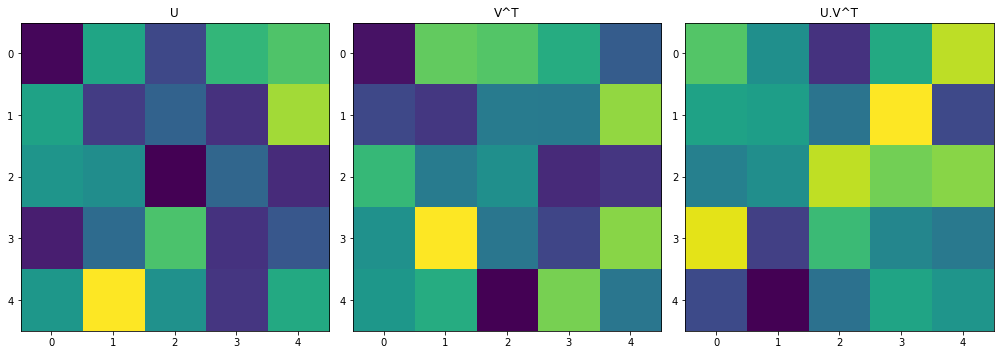

In [40]:
fig,ax = plt.subplots(1,3,figsize=(14,7))
ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(transpose_V)
ax[1].set_title('V^T')

ax[2].imshow(U@transpose_V)
ax[2].set_title('U.V^T')

plt.tight_layout()
plt.show()


1. U is a orthogonal bases of column vectors.
2. V.T is a orthogonal bases of row vectors.
3. U@V.T is an identity matrix when the A is a symmetric matrix. you can play with it and see it yourself!. but when the matrix is not symmetric U@V.T gives a matrix with some values not identity matrix.
U and V have same elements and are same when the original matrix is a symmetric matrix but the columns of U are rows of V.T.

In [41]:
#2. find the norm of U and norm of transpose_V and the norm of U@tranpose_v

np.linalg.norm(U,2) # l2 norm for matrices. l1 norm is the default which is for vectors.

In [42]:
np.linalg.norm(transpose_V,2)

In [43]:
np.linalg.norm(U@transpose_V,2)

* they are all same but how the identity matrix(U@V.T) has the same norm as U and V?
* U is a pure rotation matrix.
* V is a pure rotation matrix.
* U@transpose_V is composite of (combination of) two pure rotation matrices.

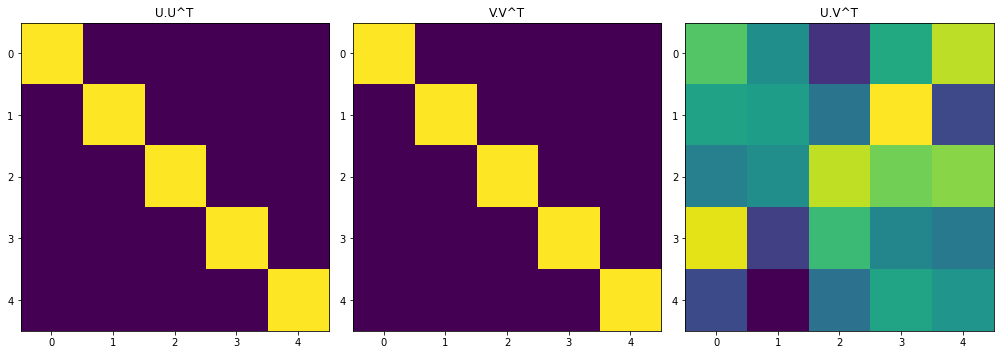

In [44]:
# 3. compute and visualize U@U.T and V@V.T and U@V.T
fig,ax = plt.subplots(1,3,figsize=(14,7))
ax[0].imshow(U@U.T)
ax[0].set_title('U.U^T')

ax[1].imshow(transpose_V.T@transpose_V)#V@V.T
ax[1].set_title('V.V^T')

ax[2].imshow(U@transpose_V)
ax[2].set_title('U.V^T')

plt.tight_layout()
plt.show()


* they are all identity matrices obviously. U.V^T is also an identity matrix when the matrix has symmetric elements.
* remember from the projection lecture, when orthogonal matrices are multiplied with their transpose produce identity matrix? 

In [45]:
# deep analysis

# but are they really identity matrices?

np.round(U@U.T,5)

array([[ 1.,  0., -0., -0.,  0.],
       [ 0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  1.,  0.,  0.],
       [-0., -0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

yes it is an identity matrix

In [46]:
np.round(transpose_V.T@transpose_V,5)

array([[ 1., -0., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1., -0.,  0.],
       [ 0.,  0., -0.,  1., -0.],
       [ 0.,  0.,  0., -0.,  1.]])

yes it is an identity matrix

In [47]:
np.round(U@transpose_V,5)

array([[ 0.39199, -0.0034 , -0.59974,  0.18248,  0.67331],
       [ 0.12405,  0.10311, -0.19589,  0.84283, -0.47461],
       [-0.11214, -0.01176,  0.68061,  0.48085,  0.54115],
       [ 0.77587, -0.52352,  0.30203, -0.07314, -0.16548],
       [-0.4652 , -0.84566, -0.21792,  0.14063,  0.03435]])

# day 385

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

## challenge:

Consider a 4x4 random matrix (matrix A) with singular values 1, 2, 3, and 4. You apply the Gram-Schmidt procedure to that matrix and call it Q. What are the singular values of Q?







In [2]:
A = np.random.randn(4,4)
A

array([[-0.16415451, -0.08705208,  0.55095913,  0.15931157],
       [ 2.48451192, -0.09690384,  0.20294919,  0.05226339],
       [-0.91304517,  0.53369773,  0.79518016, -0.35506957],
       [ 0.20327658, -0.02666262, -1.51038476, -0.28176109]])

In [3]:
U,s,transpose_V = np.linalg.svd(A)
s

array([2.69736476, 1.79243028, 0.61622913, 0.02834798])

In [4]:
Q,R = np.linalg.qr(U)
Q

array([[-0.06171607,  0.21659161,  0.41714042,  0.88049592],
       [ 0.93408519, -0.32499149,  0.11752719,  0.0897371 ],
       [-0.34327144, -0.92049538,  0.04441152,  0.18133006],
       [ 0.07642453,  0.01252414, -0.90011602,  0.42871155]])

In [5]:
U,s,transpose_V = np.linalg.svd(Q)
s

array([1., 1., 1., 1.])

**All orthogonal matrices have singular values as [1,1,1,...]**

you can play with other orthogonal matrices to see the theorem take effect

## challenge:
    
prove that an identity matrix is an orthogonal matrix using SVD.

In [15]:
A = np.eye(4)
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [16]:
U,s,transpose_V = np.linalg.svd(A)
s

array([1., 1., 1., 1.])

* we see that the singular values of identity matrices is [1,1,....1_n] Hence it is proved that all identity matrices are orthogonal matrices

## exploration, analysis and freethrows

In [17]:
U

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [18]:
transpose_V

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### other ways to find orthogonality

![formal definition](images/orthogonal_matrix1.png)
* the dot product of qi and qj is 1 if i = j that means you are computing the dot product of the column with itself.
* the dot product of qi and qj is 0 if i != j that means `you are computing the dot product between two different columns and the result would be zero`.

In [19]:
i = 0
j = 0
A[:,i].T@A[:,j] # dot product of first column with itself

In [20]:
i = 0
j = 1
A[:,i].T@A[:,j] # dot product of first column with the 2nd column

# day 387

# connection between SVD,matrix inverse and pseudo inverse:


* when to use pseudo inverse? lets say you have a square matrix but it is rank deficient that's when you'd use a pseudo inverse.


## know how to use SVD to invert a full-rank invertible matrix.
![sfsdf](images/140624_lin.png)
![sfsdf](images/140624_lin1.png)

* inverse of an orthogonal matrix is its transpose. refer orthogonalization and projection lecture if you need more clarity.


## know how to compute the infamous moore-penrose pseudo inverse:
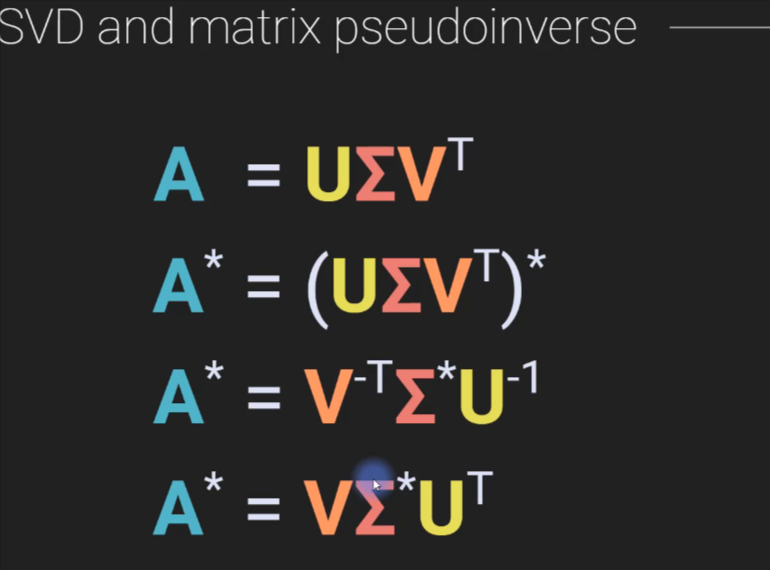
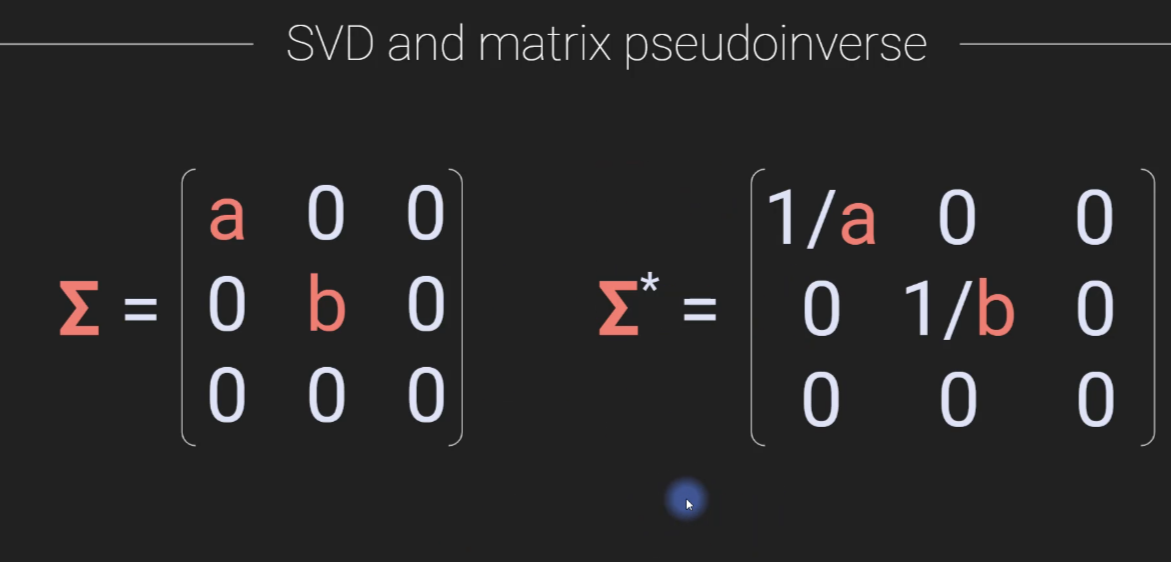
* $A^{*} = U^{T} \Sigma^{*} V $
* where $ * $ indicates pseudo inverse


## difference:
* In normal inverse we divide 1/X where X is [x1,x2,x3 ....xn] of diagonal elements of the matrix.
* In pseudo inverse, in a rank deficient matrix some of the diagonal elements will be 0's so, we divide 1/X where X is [x1,x2,x3 ... xn] where x are only non-trivial,non-zero elements.
* That's it. That's the only difference.

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

## observing how taking the inverse of diagonal matrix works!!

![sfsdf](images/140624_lin1.png)

* when we take the inverse of a diagonal matrix all we do is we divide 1 with each of the diagonal element of the matrix (1/x).
* the edge case: suppose we have a zero as a diagonal element then we would have to divide 1 over 0 (1/0) which would lead to undefined value. This is the reason why singular matrices whose determinant is 0 have no inverse because of this constraint.

In [6]:
a = np.diag([7,2,3,4])

a

array([[7, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [7]:
np.linalg.inv(a)

array([[0.14285714, 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.25      ]])

simple algorithm behind this transformation is we divide 1 with each of the diagonal element of the matrix (1/x)

## implementation of the pseudo inverse

In [9]:
# creating a rank deficient square matrix

rank = 3
cols = 4
rows = 4

A = np.random.randint(1,9,(rows,rank)) @ np.random.randint(1,3,(rank,cols))
A

array([[18, 29, 30, 31],
       [21, 36, 35, 34],
       [ 6,  9, 11, 10],
       [18, 29, 30, 31]])

In [33]:
# SVD

U,s,transpose_V  = np.linalg.svd(A)

# in s, divide 1 only by the non zero diagonals and leave the zeros 
nonzero_diagonals = s > 10**-14
s[nonzero_diagonals] = 1/s[nonzero_diagonals]

s

array([9.75871060e-03, 4.07211820e-01, 8.62240791e-01, 5.32131285e-15])

### exploration, ablation-analysis and freethrows

In [26]:
U,s,transpose_V  = np.linalg.svd(A)

In [27]:
10**-14

In [28]:
s > 10**-14 # getting only the s values that are not zeros(with precision upto 14 decimals)

array([ True,  True,  True, False])

In [29]:
# another technique
np.finfo(float).eps

In [30]:
# getting only the s values that are not zeros(with precision upto 14 decimals)
s > np.finfo(float).eps

array([ True,  True,  True,  True])

In [31]:
# no that doens't work properly since our zero in s is of 15 decimal precision so, lets stick with our first technique
s[s > 10**-14]

array([102.47255415,   2.45572439,   1.15976884])

In [32]:
s

array([1.02472554e+02, 2.45572439e+00, 1.15976884e+00, 5.32131285e-15])

In [37]:
# now find the pseudo inverse
normal_V = transpose_V.T # since U becomes transposed and V becomes non-transposed
A_pinv_manual = normal_V @ np.diag(s) @ U.T # V@s@U.T
A_pinv_manual

array([[ 1.37362637e-03,  2.74725275e-03,  1.25328350e-15,
         1.37362637e-03],
       [-6.18131868e-02,  2.09706960e-01, -3.33333333e-01,
        -6.18131868e-02],
       [-1.38736264e-01,  5.58608059e-02,  6.66666667e-01,
        -1.38736264e-01],
       [ 2.07417582e-01, -2.51831502e-01, -3.33333333e-01,
         2.07417582e-01]])

In [36]:
# inbuilt pinv

np.linalg.pinv(A)

array([[ 1.37362637e-03,  2.74725275e-03,  1.25322929e-15,
         1.37362637e-03],
       [-6.18131868e-02,  2.09706960e-01, -3.33333333e-01,
        -6.18131868e-02],
       [-1.38736264e-01,  5.58608059e-02,  6.66666667e-01,
        -1.38736264e-01],
       [ 2.07417582e-01, -2.51831502e-01, -3.33333333e-01,
         2.07417582e-01]])

In [40]:
# checking if A@A^{-1} gives identity matrix
A@np.linalg.pinv(A)

array([[ 5.00000000e-01,  1.99840144e-15,  0.00000000e+00,
         5.00000000e-01],
       [-2.66453526e-15,  1.00000000e+00,  7.10542736e-15,
        -1.77635684e-15],
       [ 4.44089210e-16,  2.22044605e-16,  1.00000000e+00,
        -2.22044605e-16],
       [ 5.00000000e-01,  1.99840144e-15,  0.00000000e+00,
         5.00000000e-01]])

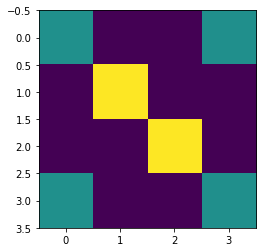

In [39]:
plt.imshow(A@np.linalg.pinv(A));

* it is not an identity matrix as it would be with full rank square matrices

In [43]:
# seeing the source codes of np.linalg.pinv

import inspect
print(inspect.getsource(np.linalg.pinv))

@array_function_dispatch(_pinv_dispatcher)
def pinv(a, rcond=1e-15, hermitian=False):
    """
    Compute the (Moore-Penrose) pseudo-inverse of a matrix.

    Calculate the generalized inverse of a matrix using its
    singular-value decomposition (SVD) and including all
    *large* singular values.

    .. versionchanged:: 1.14
       Can now operate on stacks of matrices

    Parameters
    ----------
    a : (..., M, N) array_like
        Matrix or stack of matrices to be pseudo-inverted.
    rcond : (...) array_like of float
        Cutoff for small singular values.
        Singular values less than or equal to
        ``rcond * largest_singular_value`` are set to zero.
        Broadcasts against the stack of matrices.
    hermitian : bool, optional
        If True, `a` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for finding singular values.
        Defaults to False.

        .. versionadded:: 1.17.0

    Returns
    -------
    

# day 388

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

# connection between SVD, Left inverse, Pseudo inverse:

## Prove that the left inverse of a tall matrix equal its SVD inverse:

## Prove that the right inverse of a fat matrix equal its SVD inverse:


## Appreciate why moore-penrose pseudo inverse is the best method for finding the inverse of a tall matrix(full column rank) and it even works well with reduced rank tall matrices:




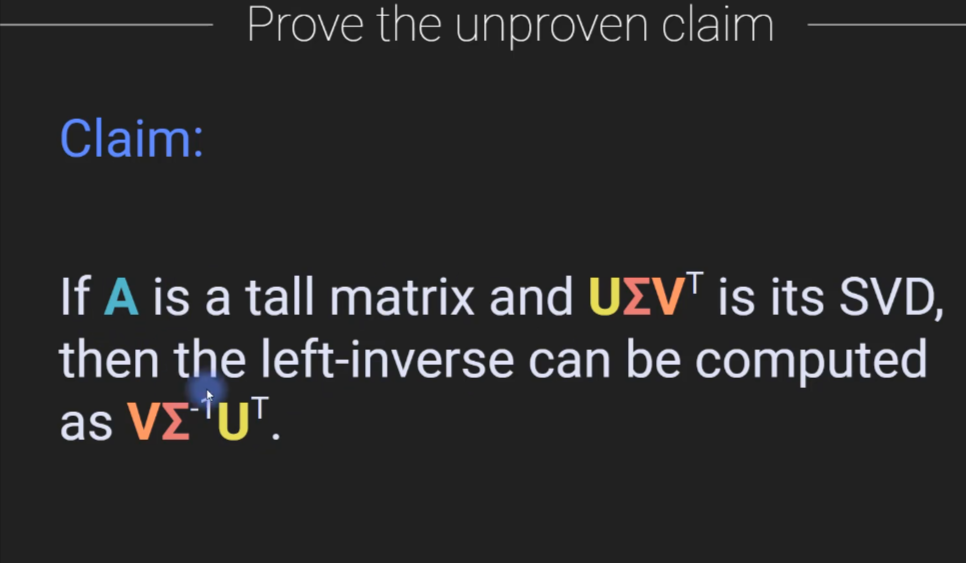

In [15]:
# create a full column rank tall matrix
rows = 5
cols = 3
A = np.random.randint(0,9,(rows,cols)) 
A

array([[0, 7, 0],
       [5, 0, 4],
       [1, 6, 6],
       [5, 0, 5],
       [1, 4, 3]])

In [16]:
np.linalg.matrix_rank(A)

3

In [17]:
# SVD
U,s,transpose_V = np.linalg.svd(A)
s

array([12.67411509,  8.44593533,  2.65197723])

In [22]:
# find the inverse of A using SVD
normal_V = np.transpose(transpose_V)
A_inv = normal_V@np.linalg.inv(np.diag(s))@U[:cols,:cols].T
A_inv

array([[ 0.15044423,  0.14907927, -0.16218296],
       [ 0.1351566 ,  0.01037375, -0.00828908],
       [-0.16990123, -0.05288629,  0.17622971]])

In [21]:
np.linalg.pinv(A)

array([[ 0.15044423,  0.14907927, -0.16218296,  0.08735792, -0.02000298],
       [ 0.1351566 ,  0.01037375, -0.00828908, -0.01389785,  0.02590956],
       [-0.16990123, -0.05288629,  0.17622971,  0.01104383,  0.03298258]])

* last 2 cols are missing in our manual calculation.

In [19]:
normal_V.shape,np.diag(s).shape,U.T.shape

In [27]:
np.linalg.inv(A.T@A) @ (A.T@A) 

array([[ 1.00000000e+00, -6.66133815e-16, -1.63757896e-15],
       [ 4.16333634e-17,  1.00000000e+00,  2.63677968e-16],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

## Prove that the left inverse of a tall matrix equal its SVD inverse:
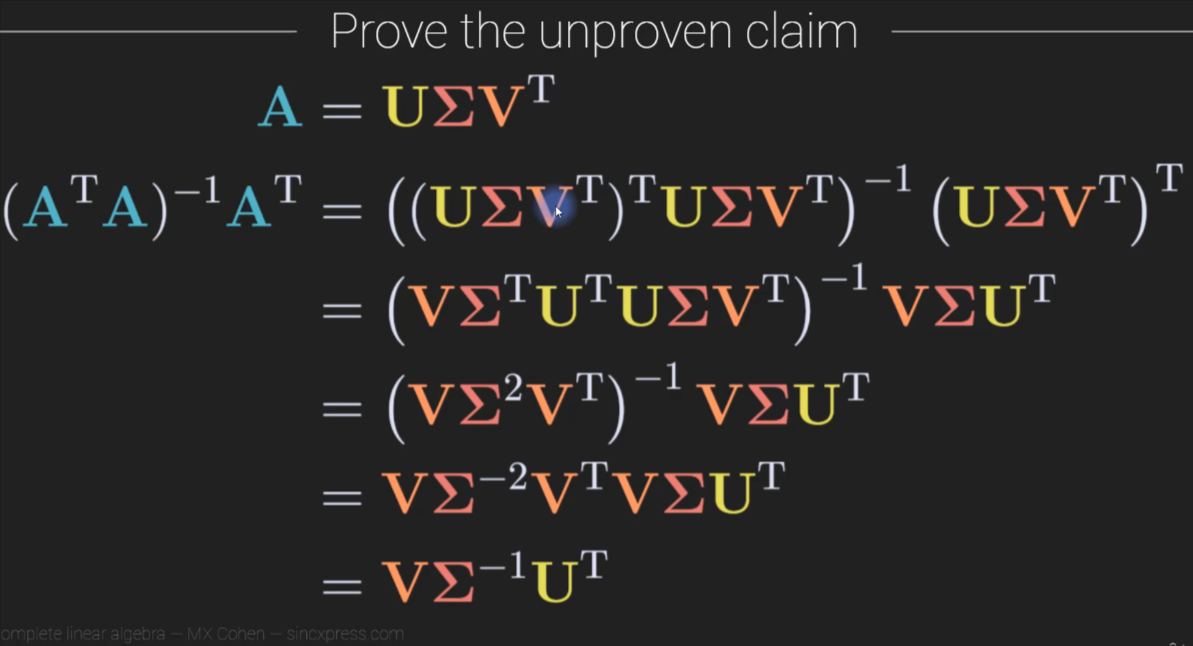

## now prove the same for the right inverse of a matrix!!!

In [2]:
# full row rank matrix
rows = 3
cols = 8
A = np.random.randint(0,9,(rows,cols))
A

array([[6, 8, 1, 2, 2, 2, 8, 1],
       [8, 5, 0, 3, 3, 8, 7, 6],
       [2, 5, 7, 8, 7, 2, 3, 1]])

In [31]:
(A@A.T) @ np.linalg.inv(A@A.T)

array([[ 1.00000000e+00, -5.20417043e-17, -4.16333634e-17],
       [ 1.34441069e-16,  1.00000000e+00,  3.12250226e-17],
       [-3.07046055e-16, -9.54097912e-17,  1.00000000e+00]])

* identity matrix it is!! so it is the right method to get the right inverse of a full row rank matrix
* now prove it on a piece of paper. Time to test yourself

In [5]:
# svd for right inverse
U,s,transpose_V = np.linalg.svd(A)
U.shape,np.diag(s).shape,transpose_V.shape

In [8]:
V = transpose_V.T
V[:rows,:rows]@np.linalg.inv(np.diag(s))@U.T

array([[ 0.01748408,  0.02818573, -0.0180443 ],
       [ 0.08290646, -0.03859635,  0.00095594],
       [-0.00856029, -0.02011607,  0.05173213]])

In [7]:
np.linalg.pinv(A)

array([[ 0.01748408,  0.02818573, -0.0180443 ],
       [ 0.08290646, -0.03859635,  0.00095594],
       [-0.00856029, -0.02011607,  0.05173213],
       [-0.02881267,  0.00546298,  0.05217156],
       [-0.02464498,  0.00658917,  0.04418587],
       [-0.06497029,  0.07711678, -0.00137351],
       [ 0.06677633, -0.01038531, -0.01726782],
       [-0.05695067,  0.06451706, -0.00293913]])

# Condition number of a matrix

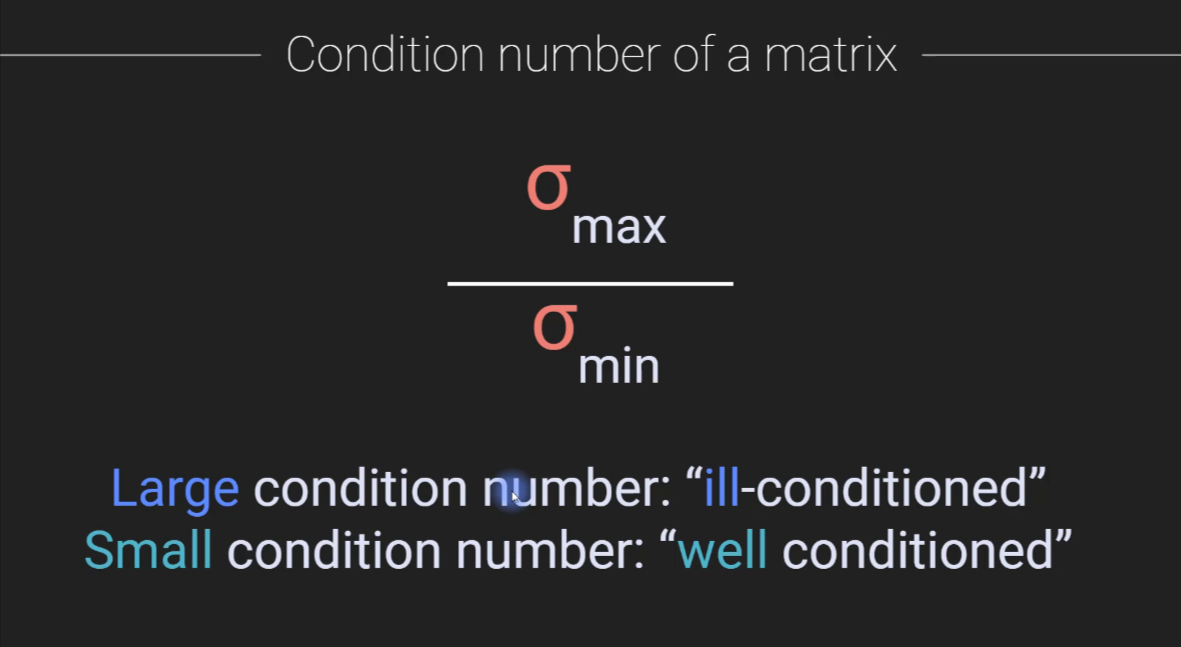

* condition number of a matrix is  = $ \frac{\text{largest singular value} } {\text{smallest singular value}} $ 
* condition number doesn't indicate the noisiness of data in the matrix or anything.
* condition number indicates the dominance of the largest structure of the matrix. 
* A well conditioned matrix has its largest structure well dominated


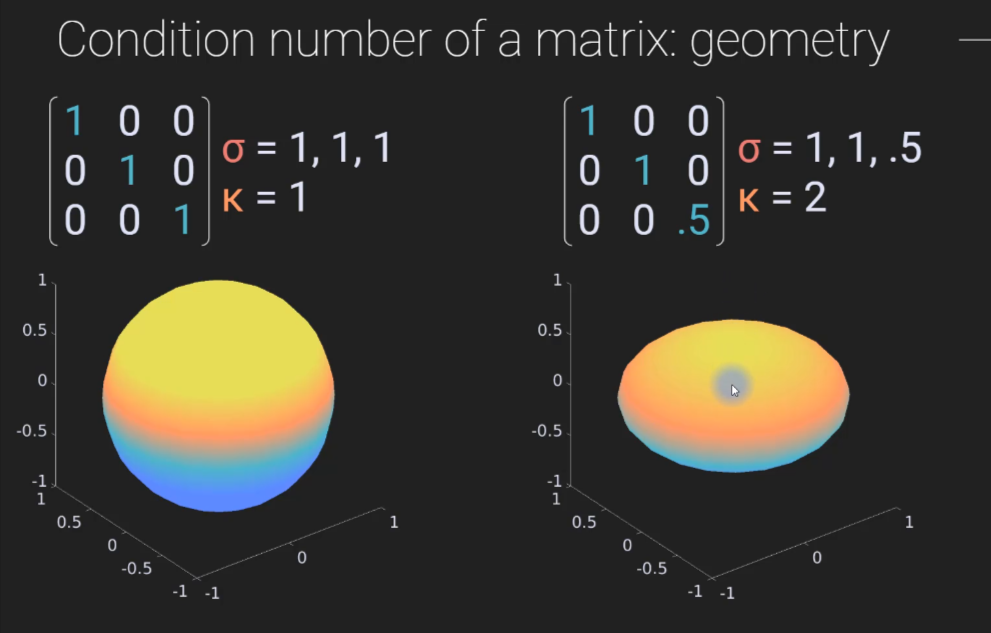
* A well conditioned number has the smallest kappa value.
* A ill conditioned matrix has the largest kappa value.
* A well conditioned matrix seems to produce a perfect sphere.
* A ill conditioned matrix seems to produce an imperfect, elliptical sphere (bulging on the sides).


## important notes:
* condition number of a matrix doesn't imply anything about the quality of the data the matrix has in store. sometimes a matrix with a large condition number (a ill-conditioned matrix) may have meaningful information/patterns about the nature and a matrix with the smallest condition number may have just pure randomly generated numbers (just noise).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math
from PIL import Image
import requests
from io import BytesIO

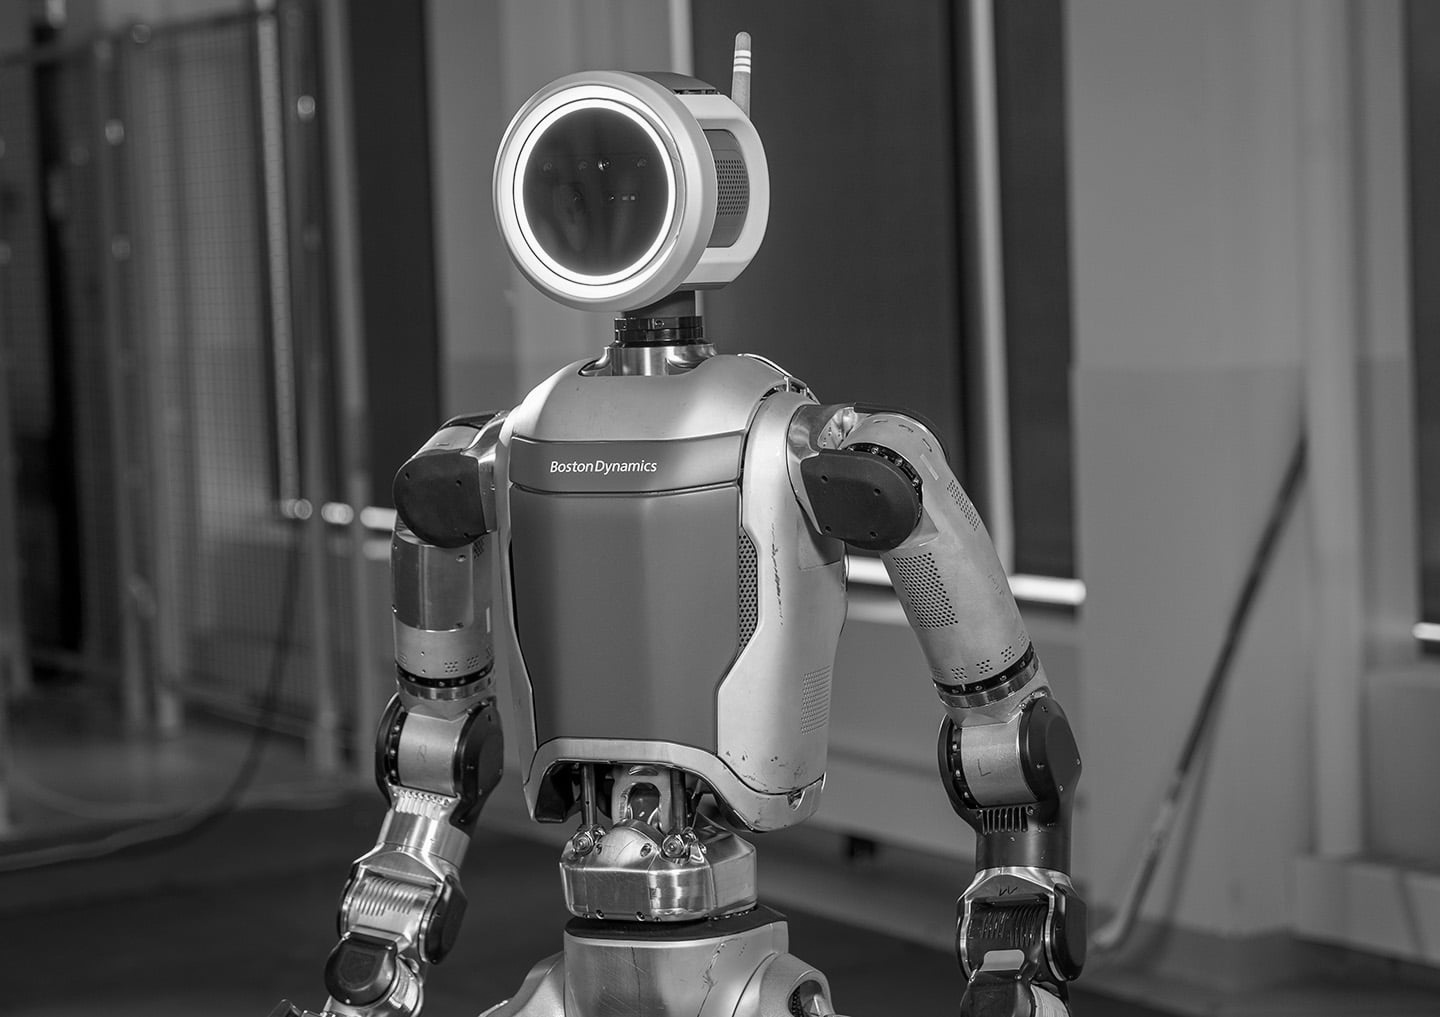

In [2]:
url = 'https://bostondynamics.com/wp-content/uploads/2024/04/atlas-yellow.jpg'
response = requests.get(url).content
image_data = BytesIO(response)

image = Image.open(image_data)

# grey image to get rid off the color dimension (so that we don't have to work with a tensor now)
grey_image = image.convert('L')
grey_image

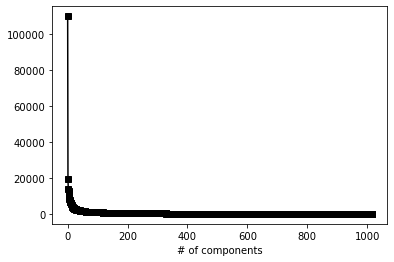

In [3]:
# lets see the condition number of the above matrix
U,S,transpose_V = np.linalg.svd(grey_image)


# make a scree plot to determine the optimal number of components for the matrix
plt.plot(S,'ks-')
plt.xlabel('# of components')
plt.show()



In [36]:
condition_number = np.max(S)/np.min(S)
condition_number

* even though the image has some meaningful, descipherable pattern the condition number is large(57000 ish)
* perhaps the condition number of matrices whose data can be explained by fewer components that explain the most of the variances of the matrix would be larger in general who knows?

In [5]:
grey_image.size

(1440, 1017)

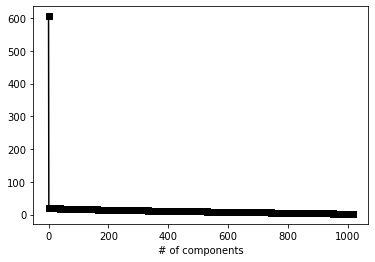

In [9]:
# lets produce a random matrix with the same size as the robot image.
X = np.random.rand(1440,1017)

U,sigma,transpose_V = np.linalg.svd(X)

# make a scree plot to determine the optimal number of components for the matrix
plt.plot(sigma,'ks-')
plt.xlabel('# of components')
plt.show()



see! it takes nearly all the components to explain the variance of the random data whereas for the previous robot image matrix we may need only fewer components than all components to explain the maximum variance of the data

In [7]:
condition_number2 = np.max(sigma)/np.min(sigma)
condition_number2

335.0402620091998

* see! even though it is just a random matrix filled with random elements we have a low condition number indicating that it is well conditioned.

# create a matrix with desired condition number:

## steps:
1. create a random matrix
2. set the min and max number of Singular values of the matrix.
3. recreate the matrix with the modified singular values.

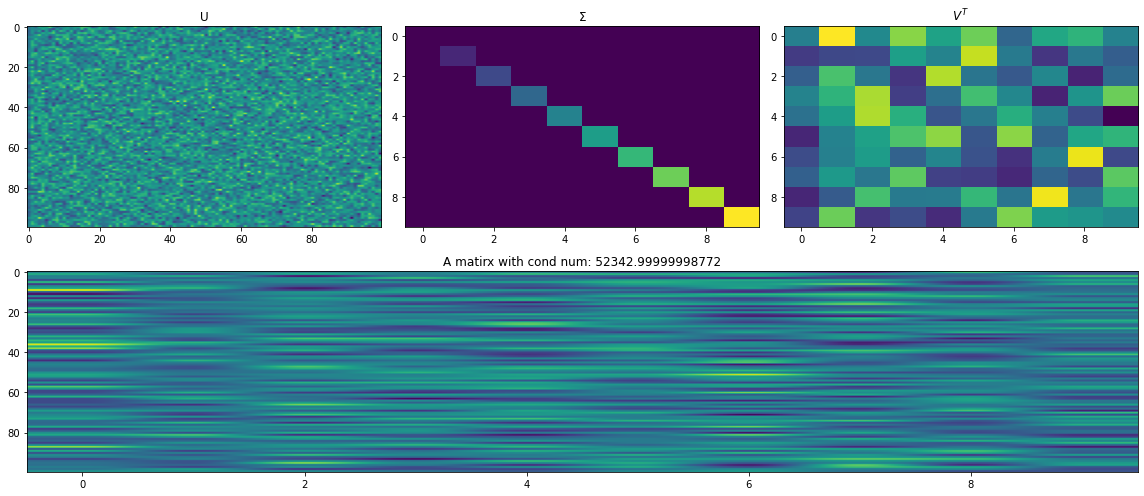

In [10]:
from matplotlib.gridspec import GridSpec

m = 100
n = 10 # size of matrices

min_num = 2
condition_number = 52343
max_num = 2*condition_number

# lets create orthogonal matrices
"""
(orthogonal U = U_parallel_to_reference_matrix + U_perpendicular_to_reference_matrix)
"""
U,r = np.linalg.qr(np.random.rand(m,m)) # orthogonal U column matrix 
s = np.linspace(min_num,max_num,np.min([m,n])) # s is going to be in the size of min(rows,cols)
S = np.zeros((m,n))
for i in range(len(s)):
    S[i,i] = s[i]
    
transposed_V,r = np.linalg.qr(np.random.rand(n,n)) # orthogonal V row matrix

# creating the matrix
A = U@S@transposed_V

# plot the transformation
fig = plt.figure(figsize=(16, 7))
gs = GridSpec(2, 3, figure=fig)

# Plot U, Sigma, and V^T
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(U, aspect='auto', cmap='viridis')
ax1.set_title('U')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(np.diag(s), aspect='auto', cmap='viridis')
ax2.set_title('$\Sigma$')

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(transposed_V, aspect='auto', cmap='viridis')
ax3.set_title('$V^{T}$')

# Plot the matrix A spanning the entire bottom row
ax4 = fig.add_subplot(gs[1, 0:3])
ax4.imshow(A, aspect='auto', cmap='viridis')
ax4.set_title('A matirx with cond num: %s'%(np.linalg.cond(A)))

plt.tight_layout()
plt.show()

## exploration, ablation-analysis and freethrows

In [51]:
U.shape,S.shape

((100, 100), (100, 10))

In [49]:
np.diag(s).shape

(10, 10)

In [15]:
transpose_V

array([[-0.67540513, -0.69976305, -0.2327221 ],
       [-0.55846662,  0.69144025, -0.4582853 ],
       [-0.48160455,  0.17956072,  0.8577966 ]])

In [16]:
A

array([[7, 6, 2],
       [6, 5, 3],
       [2, 6, 0]])

In [17]:
U@np.diag(s)@transpose_V

array([[16.78659189, 16.13953713,  5.3721334 ],
       [14.59612957, 13.90614178,  5.96193976],
       [ 7.78262562, 11.99117117,  1.99250007]])

In [41]:
np.min([m,n])

10

# code challenge: Illustrate the danger of computing Inverses of matrices!!

# day 391

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

In [14]:
# create a matrix with a known condition number

min_cond = 5
condition_number = 8
max_cond = condition_number*min_cond

rows = 5
cols = 5

# creating singular values
s = np.linspace(min_cond,max_cond,np.min([rows,cols]))
S = np.zeros((rows,cols))
for i,element in enumerate(s):
    S[i,i] = element
    
    
U,r = np.linalg.qr(np.random.rand(rows,rows)) # qr decomposition
transpose_V,r = np.linalg.qr(np.random.rand(cols,cols))

A = U@S@transpose_V

# seeing if condition number of A is = originally set by us of differs
np.linalg.cond(A)

In [16]:
# compute the inverse of A

A_inv = np.linalg.inv(A) # this only works only if A is a square matrix.
A_inv

array([[ 0.07768098,  0.02691331,  0.02780668,  0.11229473,  0.05231373],
       [-0.03047186, -0.01588136,  0.0037788 , -0.03945291,  0.01985878],
       [-0.05390619, -0.03271237, -0.01838876, -0.02026359, -0.02424022],
       [ 0.04147212,  0.01790703, -0.03401556,  0.06485707,  0.02221715],
       [ 0.0454745 , -0.04489532, -0.01389251,  0.0723106 ,  0.01317413]])

In [18]:
# multiply A@A^{-1} to get I

I = A@A_inv
I

array([[ 1.00000000e+00, -4.55110199e-18, -1.66270583e-19,
         1.33474700e-17,  6.54173638e-17],
       [ 1.78275334e-16,  1.00000000e+00, -1.96647904e-17,
        -3.36497283e-17, -3.10689406e-17],
       [ 1.29649105e-17, -6.77056204e-17,  1.00000000e+00,
        -2.01438817e-16, -2.51013157e-17],
       [ 1.01677455e-16,  2.89211990e-17, -3.58898826e-17,
         1.00000000e+00,  4.15415830e-17],
       [-1.01784795e-16, -6.09804426e-17,  3.81352593e-17,
        -7.46028494e-17,  1.00000000e+00]])

In [19]:
# compute the norm of the difference between I and np.eye()

diff = np.linalg.norm(I-np.eye(I.shape[0]))
diff

In [25]:
# Repeat for matrices of size 2-70 and condition number from 10 to 10^12 


min_cond = 1
condition_number = np.linspace(10,10**12,100)
max_cond = condition_number*min_cond

# matrix sizes rows = cols to get inverses
rows = np.arange(2,71,1)
cols = rows

# to store the values of condition number and matrix size in a matrix
mat = np.zeros((len(rows),len(condition_number)))

# creating singular values
for i in range(len(rows)):    
    for j in range(len(condition_number)):
        s = np.linspace(min_cond,max_cond[j],np.min([rows[i],cols[i]]))
        S = np.zeros((rows[i],cols[i]))
        for ind,element in enumerate(s):
            S[ind,ind] = element

        # qr decomposition to get orthogonal column basis and row basis matrix:    
        U,r = np.linalg.qr(np.random.rand(rows[i],rows[i])) # qr decomposition
        transpose_V,r = np.linalg.qr(np.random.rand(cols[i],cols[i]))

        # creating A
        A = U@S@transpose_V

        # compute the inverse of A
        A_inv = np.linalg.inv(A) # this only works only if A is a square matrix.

        # multiply A@A^{-1} to get I
        I = A@A_inv

        # compute the norm of the difference between I and np.eye()
        diff = np.linalg.norm(I-np.eye(I.shape[0]))
    
    
        # store the diff in mat
        mat[i,j] = diff
    




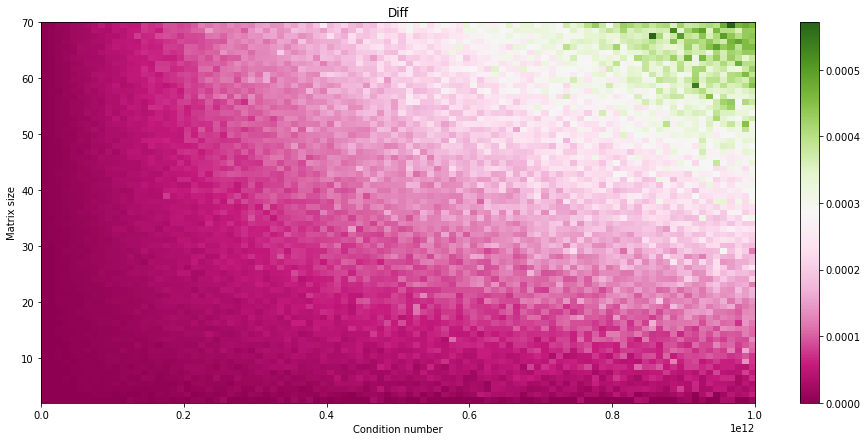

In [40]:
# show the image of the result(mat)
from matplotlib.pyplot import GridSpec

fig = plt.figure(figsize=(16,7))
gs = GridSpec(1,1,figure=fig)

ax1 = fig.add_subplot(gs[0,0])
picture = ax1.imshow(mat,extent=[condition_number[0],condition_number[-1],rows[0],rows[-1]],
           origin='lower',aspect='auto',cmap='PiYG')
ax1.set_title('Diff')
ax1.set_xlabel('Condition number')
ax1.set_ylabel('Matrix size')

fig.colorbar(picture,ax=ax1)


plt.show()

## conclusion:
* the difference between computed empirical identity matrix and original theoritical identity matrix seems to diverge as the condition number of the matrix gets larger and larger indicating the instability in the computer's ability to calculate accurate inverses.
* In our example we only went up as far as 70x70 matrices which can be translated to a picture of size 70x70 but in the real world the matrix sizes(the picture sizes) could be even larger and as we've seen with the random matrices and with some anthropomorphically meaningful pictures the condition number for the former tends to be smaller than for latter(condition number for the random matrices tend to be smaller than that of meaningful pictures). so, taking inverse for an anthropomorphically meaningful picture of large size might not be an accurate inverse that when you multiply the computed inverse with the original matrix might not produce an accurate Identity matrix. This is the caveat of computing inverses.
* so whenever possible try to take the orthogonal version of matrix(Q) by qr decomposition or by means of some other method so that computing the inverses is as easy as just transposing the matrix.

## exploration, ablation-analysis and freethrows

In [21]:
10**12

In [23]:
condition_number = np.linspace(10,10**12,100)
condition_number

array([1.00000000e+01, 1.01010101e+10, 2.02020202e+10, 3.03030303e+10,
       4.04040404e+10, 5.05050505e+10, 6.06060606e+10, 7.07070707e+10,
       8.08080808e+10, 9.09090909e+10, 1.01010101e+11, 1.11111111e+11,
       1.21212121e+11, 1.31313131e+11, 1.41414141e+11, 1.51515152e+11,
       1.61616162e+11, 1.71717172e+11, 1.81818182e+11, 1.91919192e+11,
       2.02020202e+11, 2.12121212e+11, 2.22222222e+11, 2.32323232e+11,
       2.42424242e+11, 2.52525253e+11, 2.62626263e+11, 2.72727273e+11,
       2.82828283e+11, 2.92929293e+11, 3.03030303e+11, 3.13131313e+11,
       3.23232323e+11, 3.33333333e+11, 3.43434343e+11, 3.53535354e+11,
       3.63636364e+11, 3.73737374e+11, 3.83838384e+11, 3.93939394e+11,
       4.04040404e+11, 4.14141414e+11, 4.24242424e+11, 4.34343434e+11,
       4.44444444e+11, 4.54545455e+11, 4.64646465e+11, 4.74747475e+11,
       4.84848485e+11, 4.94949495e+11, 5.05050505e+11, 5.15151515e+11,
       5.25252525e+11, 5.35353535e+11, 5.45454545e+11, 5.55555556e+11,
      

In [24]:
np.arange(2,71,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70])

# day 392,day393

# Test

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt

In [4]:
A = np.array([[0,0],
              [0,0],
              [0,0]])
U,s,transpose_V = np.linalg.svd(A)
s

array([0., 0.])

# Write MATLAB or Python code to implement the following experiment:
1. Generate a 2 × 3 matrix of random numbers.
2. Compute its SVD.
3. Compute two eigendecompositions using the matrix and its transpose.
4. Confirm that the two sets of eigenvalues match, and check whether the eigenvalues match
the singular values (consult video 159).
5. Plot the eigenvectors and singular vectors in 2D or 3D (as appropriate) to confirm that SVD
and transpose+eigendecomposition produce the same eigenspace

In [30]:
# Generate a 2x3 matrix
A = np.random.uniform(0,10,(2,3))
A = A.T@A # making the symmetric so that the matrix is square for which the eigen decomposition could be calculated.

In [31]:
# compute its SVD.
U,s,transpose_V = np.linalg.svd(A)


In [32]:
# compute two eigendecompositions using the matrix and its transpose.
eig_values_A,eig_vectors_A = np.linalg.eig(A)
eig_values_AT,eig_vectors_AT = np.linalg.eig(A.T)

In [33]:
# Confirm that the two sets of eigenvalues match, and check whether the eigenvalues match the singular values 
# (consult video 159).

np.round(eig_values_A,5),np.round(eig_values_AT,5)

(array([69.83496, -0.     ,  9.45578]), array([69.83496, -0.     ,  9.45578]))

In [34]:
np.round(s,5)

array([69.83496,  9.45578,  0.     ])

In [35]:
eig_vectors_A

array([[-0.60098541, -0.59357515, -0.53524302],
       [-0.73667237,  0.67115463,  0.08285701],
       [-0.31004897, -0.44409459,  0.84062455]])

In [36]:
U

array([[-0.60098541,  0.53524302,  0.59357515],
       [-0.73667237, -0.08285701, -0.67115463],
       [-0.31004897, -0.84062455,  0.44409459]])

In [37]:
V = transpose_V.T
V

array([[-0.60098541,  0.53524302, -0.59357515],
       [-0.73667237, -0.08285701,  0.67115463],
       [-0.31004897, -0.84062455, -0.44409459]])

look! eig_values and singular values are same just as U and V are equal with eigen vectors for a symmetric matrix (with sign uncertainty ofcourse!) however their order of configuration is not same so lets achieve it to make them equal.

In [38]:
sidx = np.argsort(eig_values_A)[::-1]
sidx

array([0, 2, 1], dtype=int64)

In [41]:
sorted_eig_values_A = eig_values_A[sidx]
np.round(sorted_eig_values_A,5)

array([69.83496,  9.45578, -0.     ])

In [43]:
np.round(s,5)

array([69.83496,  9.45578,  0.     ])

In [44]:
sorted_eig_vectors_A = eig_vectors_A[:,sidx]
sorted_eig_vectors_A

array([[-0.60098541, -0.53524302, -0.59357515],
       [-0.73667237,  0.08285701,  0.67115463],
       [-0.31004897,  0.84062455, -0.44409459]])

In [45]:
U

array([[-0.60098541,  0.53524302,  0.59357515],
       [-0.73667237, -0.08285701, -0.67115463],
       [-0.31004897, -0.84062455,  0.44409459]])

In [46]:
V

array([[-0.60098541,  0.53524302, -0.59357515],
       [-0.73667237, -0.08285701,  0.67115463],
       [-0.31004897, -0.84062455, -0.44409459]])

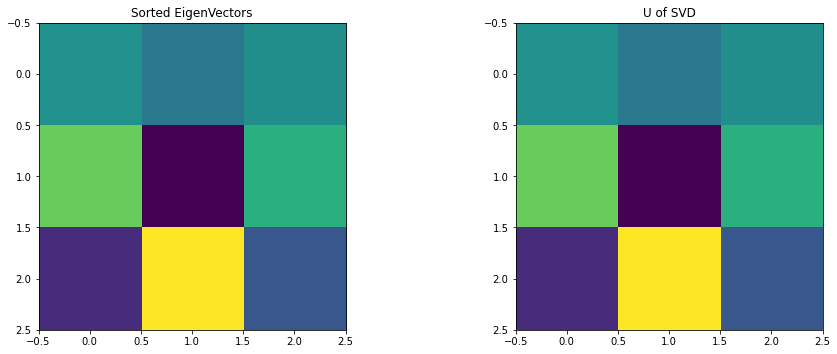

In [53]:
# Plot the eigenvectors and singular vectors in 2D or 3D (as appropriate) to confirm that SVD and transpose+eigendecomposition produce the same eigenspace.
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14,5))
gs = GridSpec(1,2,figure=fig)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

# we are squaring the values to account for sign uncertainty
ax1.imshow(sorted_eig_vectors_A**2)
ax1.set_title('Sorted EigenVectors')

ax2.imshow(U**2)
ax2.set_title('U of SVD')

plt.tight_layout(pad=1)
plt.show()


# prove orthogonal matrices only rotate the vectors not increase their magnitude when dot producted.

In [11]:
Q,R = np.linalg.qr(np.random.rand(5,5),mode='complete')
Q

array([[-0.45519008, -0.07210039,  0.45017061,  0.4246839 ,  0.63607667],
       [-0.02795815, -0.68628593,  0.56107832, -0.05405295, -0.45880209],
       [-0.76784797,  0.32356165, -0.07085112,  0.11126051, -0.53695305],
       [-0.34194294, -0.02115636,  0.09881978, -0.8918268 ,  0.27840088],
       [-0.29241215, -0.64704978, -0.68392421,  0.09480468,  0.13813571]])

In [12]:
# vector of size 5

v = np.random.randint(0,9,(5))
v

array([4, 7, 7, 1, 6])

In [14]:
# dot product the Q with v

np.dot(Q,v)

array([ 5.06687512, -3.79515143, -4.41287595, -0.04554931, -9.56284755])

In [15]:
# find the magnitude of the original vector and compare it with the magnitude of the dot productt
np.linalg.norm(v),np.linalg.norm(np.dot(v,Q))

## conclusion:
* hence it is proved that orthogonal matrices only rotate the vector never scale the magnitude of the vector when dot producted with